## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [37]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Data Ingestion
df = pd.read_csv("data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [40]:
df.shape

(193573, 11)

In [41]:
df.isnull().sum(), df.isna().sum()

(id         0
 carat      0
 cut        0
 color      0
 clarity    0
 depth      0
 table      0
 x          0
 y          0
 z          0
 price      0
 dtype: int64,
 id         0
 carat      0
 cut        0
 color      0
 clarity    0
 depth      0
 table      0
 x          0
 y          0
 z          0
 price      0
 dtype: int64)

#### there are no null values

In [42]:
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [43]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [44]:
# id won't contribute to the model training, hence dropping it
df = df.drop(labels=['id'],axis=1)
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [45]:
df.duplicated().sum()

0

#### There are no duplicate values

In [46]:
## segregatting numerical and categorical columns
# df.info()
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print(f"Numerical columns: {numerical_columns}, Categorical columns: {categorical_columns}")

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object'), Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [47]:
# df[numerical_columns.describe()
# sns.boxplot(df[numerical_columns])

In [48]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [49]:
for column in categorical_columns:
    print(f"{column}:\n{df[column].value_counts()}\n")

cut:
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

color:
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

clarity:
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64



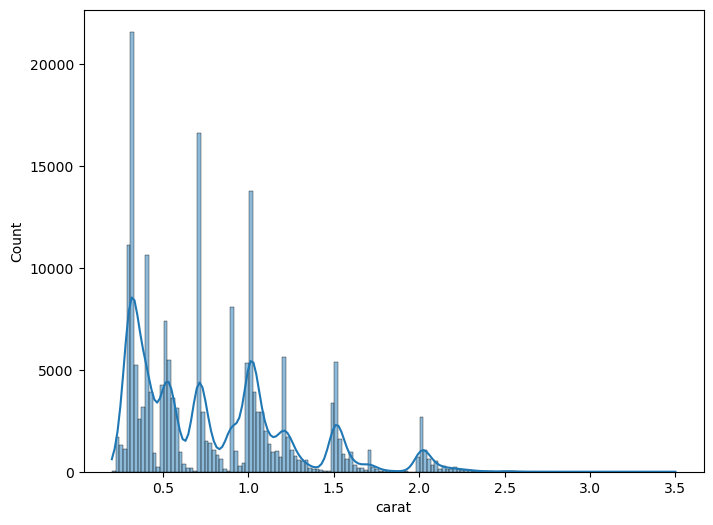

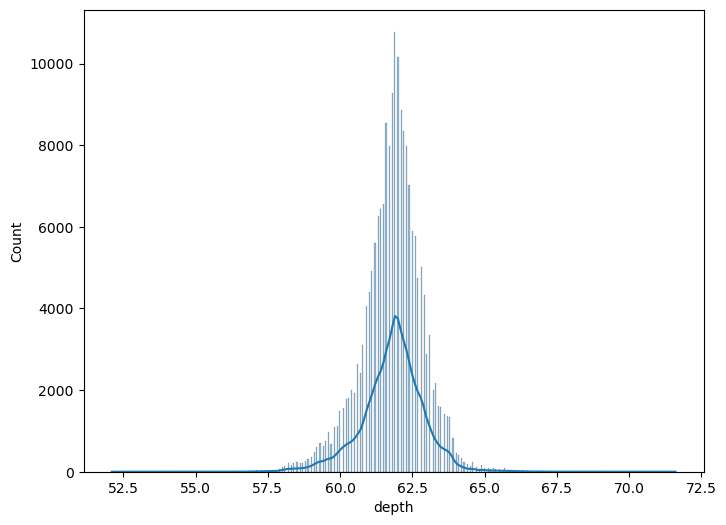

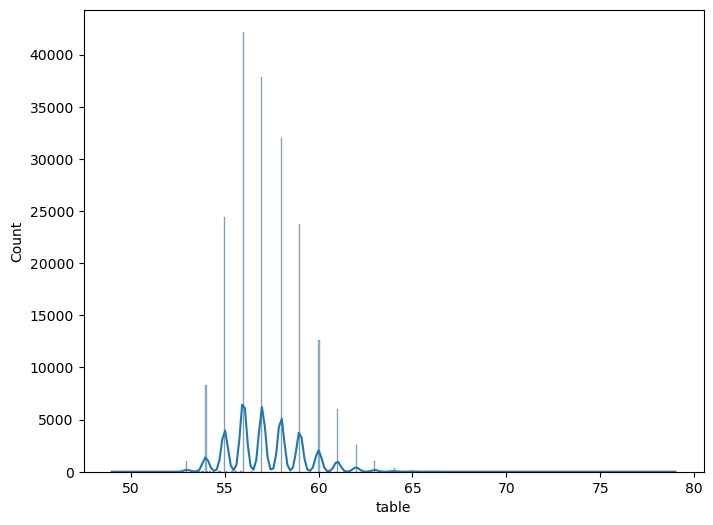

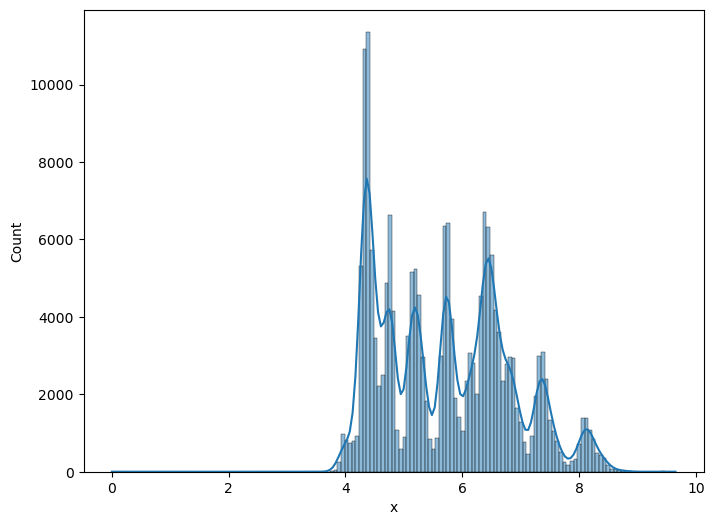

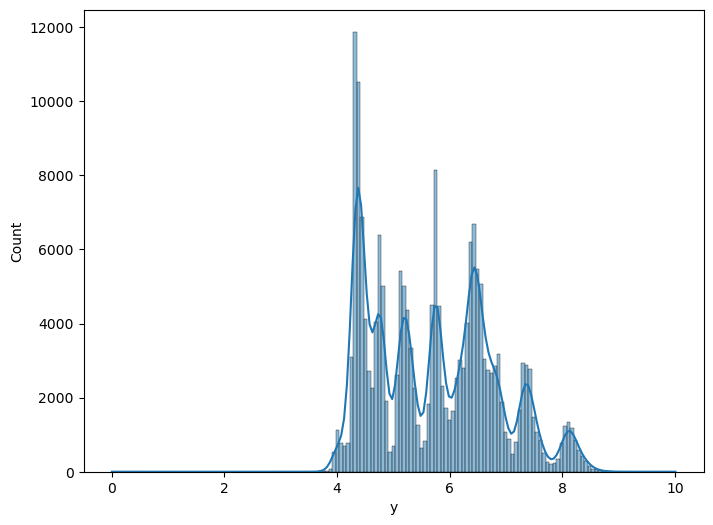

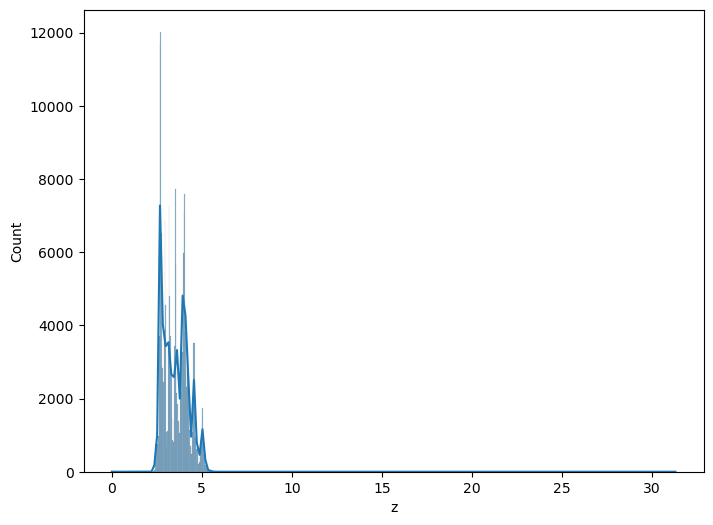

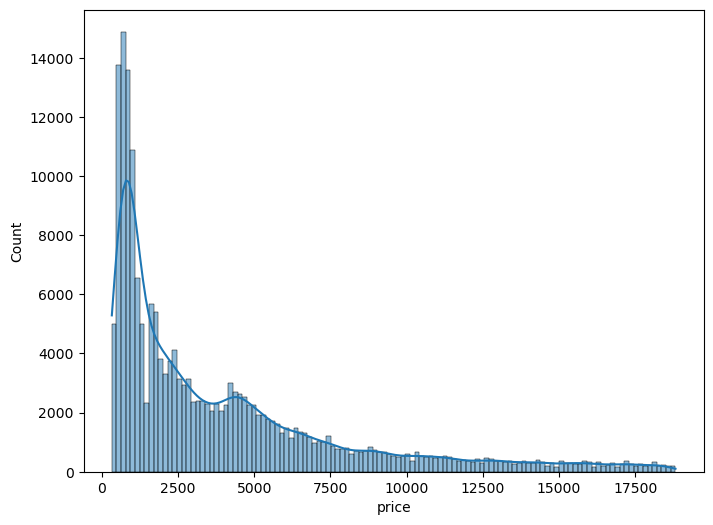

In [50]:
for column in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=column,kde=True)
    print("\n")
    plt.show()

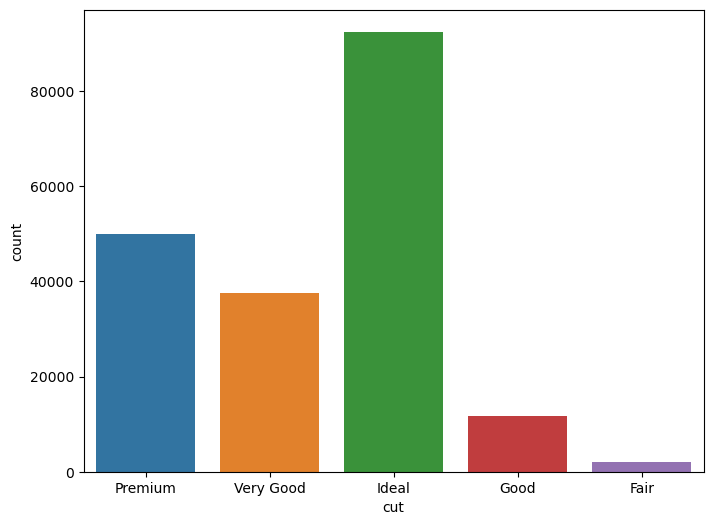

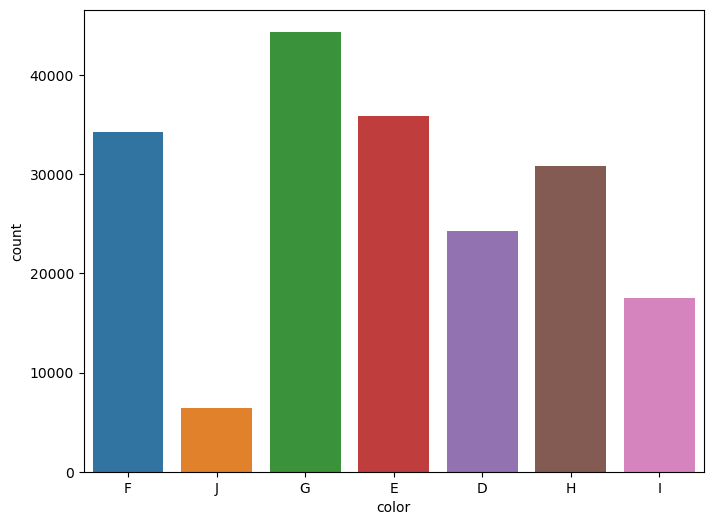

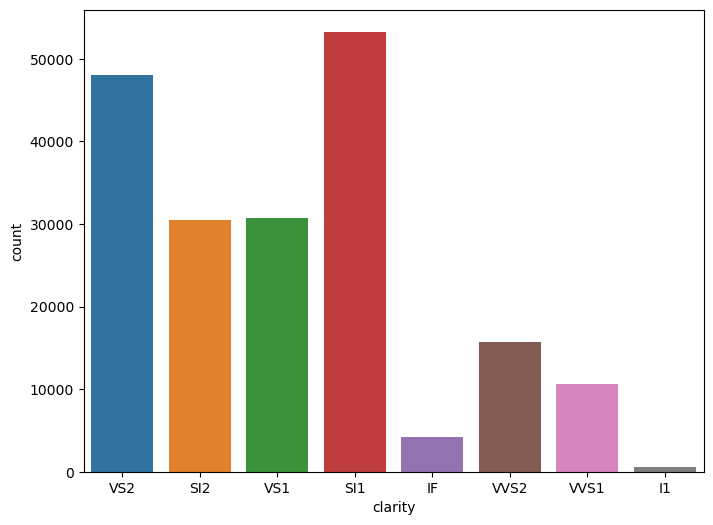

In [51]:
for column in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=column)
    print("\n")
    plt.show()

In [52]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}\n")

cut: ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']

color: ['F' 'J' 'G' 'E' 'D' 'H' 'I']

clarity: ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']



In [53]:
X = df.drop(labels=['price'],axis=1)
y = df[['price']]

In [54]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [55]:
## using ordinal mapping for cut column
cut_map = {'Fair':1, 'Good':2,'Very Good':3, 'Premium':4,'Ideal':5 }
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [56]:
## making categories to use ordinal encoder for the categorical columns istead of df[column].map()
cut_categories = list(cut_map)
clarity_categories = list(clarity_map)
color_categories = list(color_map)

In [57]:
cut_categories,clarity_categories,color_categories

(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
 ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
 ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

In [58]:
# for column in categorical_columns:
#     column_map = column+"_map"
#     global column_map
#     df[column] = df[column].map(column_map)
# df.head()

In [59]:
# df['cut']=df['cut'].map(cut_map)
# df['clarity'] = df['clarity'].map(clarity_map)
# df['color'] = df['color'].map(color_map)
# df.head()

In [60]:
## checking correlation

# sns.heatmap(df.corr(),annot=True)
# df.corr()

In [61]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [62]:
from sklearn.impute import SimpleImputer ## For Handling missing values
from sklearn.preprocessing import StandardScaler ## For Feature scaling
from sklearn.preprocessing import OrdinalEncoder ## for ordinal encoding

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [63]:
## Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy="median")),
        ('scaler',StandardScaler())
    ]
)

## Catergorical Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
        ('scaler',StandardScaler())
    ]
)

## Preprocessor - combining numerical and categorical columns
preprocessor = ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)


In [65]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.fit_transform(X_test),columns=preprocessor.get_feature_names_out())

In [68]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,2.626061,-2.888129,0.400868,2.233112,2.216066,1.856561,-0.130933,1.525655,-1.314696
1,-0.845291,0.164716,0.922458,-0.915966,-0.908068,-0.890852,-0.130933,-0.937159,-0.648656
2,-0.845291,-1.500472,1.965640,-0.843987,-0.899013,-0.963153,-0.130933,-0.321455,-0.648656
3,-0.694363,-0.667878,-0.642314,-0.637048,-0.636405,-0.673951,0.874463,-0.937159,-1.314696
4,1.548002,-0.482857,1.444049,1.477333,1.455407,1.393839,-0.130933,1.525655,0.683424


In [69]:
## Model Training
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [72]:
lin_reg.coef_,lin_reg.intercept_

(array([[ 6432.59272318,  -133.11853452,   -70.36485019, -1713.18964719,
          -490.48291102,   -68.02812257,    68.36709467,  -464.25812278,
           651.94096231]]),
 array([3979.27372333]))

In [77]:
import numpy as np
def evaluate_model(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mse)
    r2s = r2_score(actual,predicted)
    
    return mae,mse,rmse,r2s

In [80]:
evaluate_model(y_test,lin_reg.predict(X_test))


(679.0440665748298, 1029893.4315990083, 1014.8366526683042, 0.9363188785467222)

In [82]:
## train multiple models
models = {
    'lin_reg': LinearRegression(),
    'lasso_reg': Lasso(),
    'ridge_reg': Ridge(),
    'elasticnet_reg': ElasticNet()
}

trained_model_list=[]
model_list=[]
r2_list=[]

for model_name, model in models.items():
    model_name = model
    model_name.fit(X_train,y_train)
    
    #predictions
    y_pred = model_name.predict(X_test)
    mae,mse,rmse,r2s = evaluate_model(y_test,y_pred)
    
    print(model_name)
    model_list.append(model_name)
    
    print(f"Model performance-- RMSE: {rmse}, r2_square: {r2s*100}")
    
    r2_list.append(r2s)
    
    print('-'*35)
    print("\n")

LinearRegression()
Model performance-- RMSE: 1014.8366526683042, r2_square: 93.63188785467223
-----------------------------------


Lasso()
Model performance-- RMSE: 1014.8509887386555, r2_square: 93.63170793537525
-----------------------------------


Ridge()
Model performance-- RMSE: 1014.8385361993769, r2_square: 93.63186421629023
-----------------------------------


ElasticNet()
Model performance-- RMSE: 1527.150983044552, r2_square: 85.57943200273044
-----------------------------------


